In [39]:
# João A. Masiero Luz
# 1.1v 31/01/23

Regressão linear - Wine Quality - Red
Estudo sobre a qualidade do vinho

- Removendo correlações
- Treinamento e teste da regresão linear
- Métricas de Avaliação: MAE, R2 e RMSE
- Entendendo os coeficientes da regressão
- Visualização dos resultados
- Treinamento e teste da regressão com statsmodels
- Diagnóstico

sobre a base de dados - repositório da UCI
http://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [1]:
# Carregando as bibliotecas

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 

get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
# Carregando a base de dados e fazendo os checks iniciais

wine = pd.read_csv("winequality-red.csv", sep = ";")

wine.shape

(1599, 12)

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


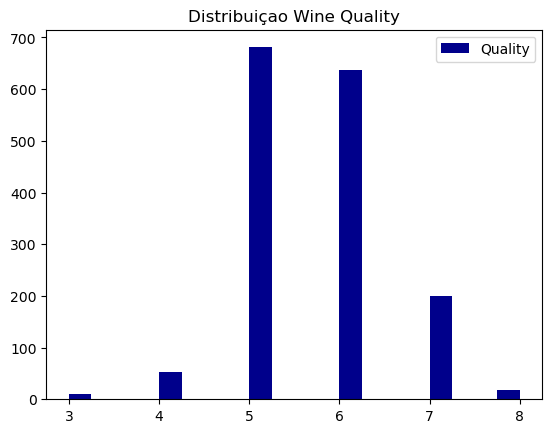

In [4]:
# Histograma - Aqui temos a distribuição de qualidade dos 1599 rótulos analisados 

plt.hist(wine["quality"], bins = 20
        , histtype = "stepfilled"
        , color = "darkblue"
        , edgecolor = "none"
        , label = "Quality");

plt.legend()
plt.title("Distribuiçao Wine Quality");


Análise de correlações entre as variáveis e o alvo

In [5]:
correl = wine.corr()['quality'].drop('quality')

correl

# Quanto mais for correlacionada, maior será a chance da variável dependente ser uma boa preditora para aquele fenômeno
# Alvo = "quality"

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64

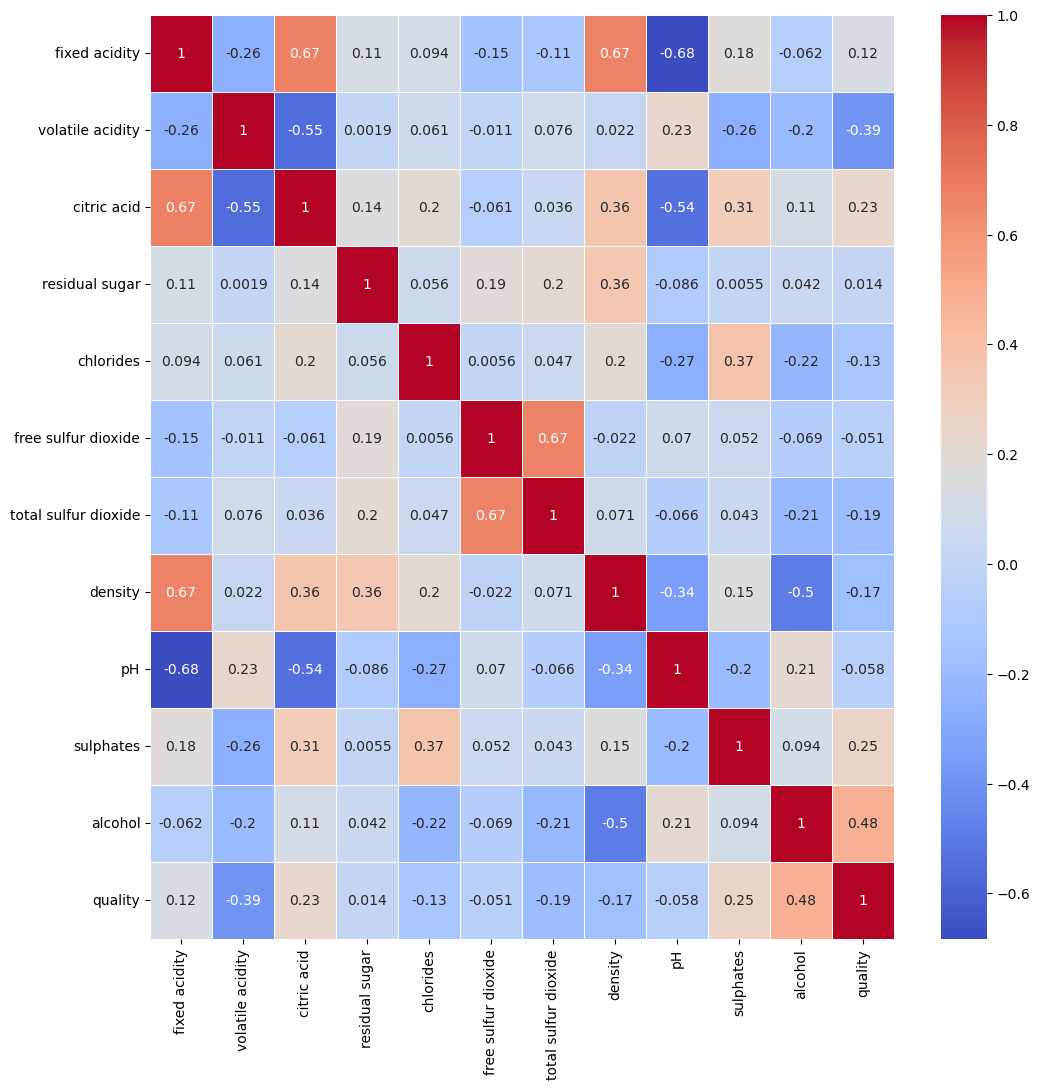

In [6]:
# Visualizando as correlaçoes - Heatmap

correl_hm = wine.corr()

fig, ax = plt.subplots(figsize=(12,12))

sns.heatmap(correl_hm, cmap = "coolwarm", annot=True, linewidths=.6, ax = ax);

In [7]:
# Vamos eliminar as variáveis correlatas em demasia e reescrever a base
# tanto faz se a correlação é positiva ou negativa, preciso eliminar as variáveis com alta correlação(>0.5), selecionando então as mais relevantes

correl_total = wine.corr().abs()

superior = correl_total.where(np.triu(np.ones(correl_total.shape), k = 1).astype(np.bool))

var_remove = [variaveis for variaveis in superior.columns if any(superior[variaveis] > 0.5)]

wine = wine.drop(wine[var_remove], axis=1)

C:\Users\joaom\AppData\Local\Temp\ipykernel_30560\746947626.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  superior = correl_total.where(np.triu(np.ones(correl_total.shape), k = 1).astype(np.bool))


In [8]:
wine.shape

(1599, 8)

Breve análise dos Outliers

In [9]:
# Procurando outliers
wine.describe()

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,2.538806,0.087467,15.874922,0.658149,10.422983,5.636023
std,1.741096,0.179060,1.409928,0.047065,10.460157,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.900000,0.012000,1.000000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,1.900000,0.070000,7.000000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,2.200000,0.079000,14.000000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,2.600000,0.090000,21.000000,0.730000,11.100000,6.000000
max,15.900000,1.580000,15.500000,0.611000,72.000000,2.000000,14.900000,8.000000


Treinamento e teste da regressão com Sklearn

In [10]:
# Separando os dados com as variaveis em x e o alvo em y

x = wine.drop('quality', axis = 1)
y = wine['quality']

In [11]:
# Separando os dados entre treinamento e teste
# Para isto precisamos da funçao train_test_split da biblioteca sklearn
# Se der qualquer problema na instalaçao da biblioteca pelo Anaconda, instale via pip
# pip install sklearn

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.50)

In [12]:
# Treinando o modelo

lr = LinearRegression()

lr.fit(x_train, y_train) # essa é a linha que treina o modelo!!!!

LinearRegression()

In [13]:
# Prediçoes para o treinamento e teste

y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

Métricas de avaliação: MAE, R2 e RMSE

In [14]:
# Avaliaçao dos resultados
import sklearn.metrics as metrics
from math import sqrt

MAE_train = metrics.mean_absolute_error(y_train, y_pred_train) 
R2_train = metrics.r2_score(y_train, y_pred_train) # Coeficiente de determinaçao
RMSE_train = sqrt(metrics.mean_squared_error(y_train, y_pred_train))

print("----- Avaliaçao do treinamento -----")
print("MAE: ", round(MAE_train,2))
print('R2: ', round(R2_train,2))
print('RMSE: ', round(RMSE_train,2))

MAE_test = metrics.mean_absolute_error(y_test, y_pred_test) 
R2_test = metrics.r2_score(y_test, y_pred_test)
RMSE_test = sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print("")
print("----- Avaliaçao do teste -----")
print("MAE: ", round(MAE_test,2))
print('R2: ', round(R2_test,2))
print('RMSE: ', round(RMSE_test,2))

----- Avaliaçao do treinamento -----
MAE:  0.51
R2:  0.35
RMSE:  0.64

----- Avaliaçao do teste -----
MAE:  0.52
R2:  0.34
RMSE:  0.66


In [15]:
# Olhando apenas para a base de teste

print("A qualidade média de vinho da base é: ")
print(round(y_test.mean(),2))
print()
print("O percentual do MAE em relaçao à média da base: ")
print(round(metrics.mean_absolute_error(y_test, y_pred_test)/y_test.mean()*100,2))

A qualidade média de vinho da base é: 
5.65

O percentual do MAE em relaçao à média da base: 
9.13


In [16]:
# percentuais do MAE razoaveis sao aqueles abaixo de 10%

### Entendendo os coeficientes da regressao

In [17]:
lr.coef_

array([ 0.03003772, -1.1269847 , -0.00550559, -2.0901759 , -0.00417318,
        0.72598281,  0.2897084 ])

In [18]:
# Mostrando os coeficientes (pesos) da regressao

coef = pd.DataFrame(lr.coef_, wine.columns[0:7])
coef.columns = ['Coeficientes'] 

print(coef)

                     Coeficientes
fixed acidity            0.030038
volatile acidity        -1.126985
residual sugar          -0.005506
chlorides               -2.090176
free sulfur dioxide     -0.004173
sulphates                0.725983
alcohol                  0.289708


In [19]:
# E o intercepto

lr.intercept_

2.7304387523392353

### A formula da regressao é

lr = 2.5967851384406377 + 0.013097 x fixed acidity - 1.158659 x volatile acidity + 0.022122 x residual sugar - 2.046714 x chlorides - 0.006119 x free sulfur dioxide + 0.916604 x sulphates + 0.303662 x alcohol

In [20]:
wine.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.70,1.9,0.076,11.0,0.56,9.4,5
1,7.8,0.88,2.6,0.098,25.0,0.68,9.8,5
2,7.8,0.76,2.3,0.092,15.0,0.65,9.8,5
3,11.2,0.28,1.9,0.075,17.0,0.58,9.8,6
4,7.4,0.70,1.9,0.076,11.0,0.56,9.4,5


In [21]:
# Fazendo a prediçao de um unico registro

lr.predict([[7.4, 0.70, 1.9, 0.076, 11.0, 0.56, 9.4]])

c:\Users\joaom\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.07841902])

### Visualizaçao dos resultados

In [22]:
# Resultados: Real x previsto em um dataframe

resultados = pd.DataFrame({'Real': y_test, 'Previsto': y_pred_test})

resultados

,Real,Previsto
1051,5,5.165669
1517,6,5.651230
840,7,6.425189
498,8,6.134586
414,5,5.306951
...,...,...
1237,6,5.915791
1084,6,5.407154
949,7,6.653408
136,5,5.247527


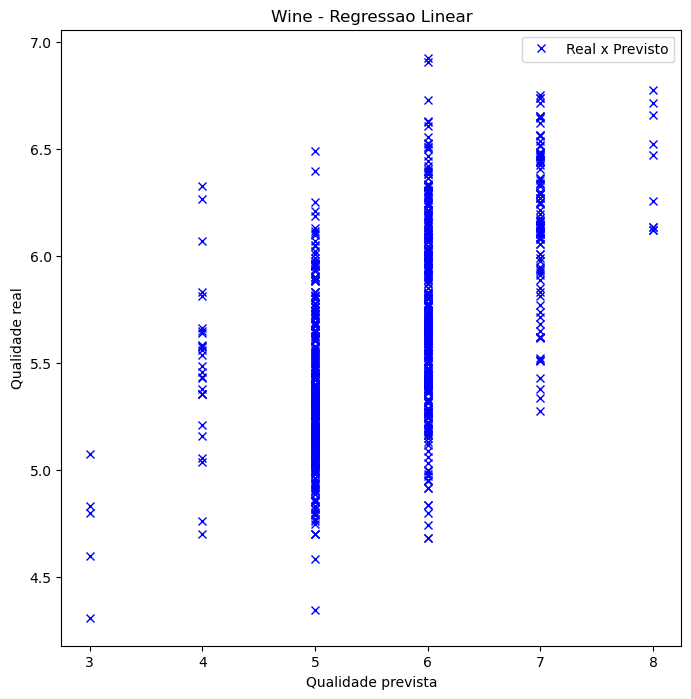

In [23]:
# Grafico dos resultados

plt.figure(figsize = (8,8))
plt.plot(y_test, y_pred_test, "x", color = "blue", label = "Real x Previsto")
plt.legend()
plt.xlabel("Qualidade prevista")
plt.ylabel("Qualidade real")
plt.title("Wine - Regressao Linear");

### Treinamento e teste da regressao linear com Statsmodels

In [24]:
#!pip install statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [25]:
# Treinando o modelo com statsmodels

# Nota importante: por padrao o statsmodels nao acrescenta o intecepto
# voce deve acrescentà-lo manualmente

x_train_ = sm.add_constant(x_train)
x_test_ = sm.add_constant(x_test)

lr_sm = sm.OLS(y_train, x_train_).fit()

y_pred_train_sm = lr_sm.predict(x_train_)

y_pred_test_sm = lr_sm.predict(x_test_)

# Print out the statistics
lr_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     60.45
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           1.73e-69
Time:                        15:51:22   Log-Likelihood:                -782.88
No. Observations:                 799   AIC:                             1582.
Df Residuals:                     791   BIC:                             1619.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.7304      0.319      8.567      0.000       2.105       3.356
fixed acidity           0.0300      0.014      2.078      0.038       0.002       0.058
volatile acidity       -1.1270      0.140     -8.074      0.000      -1.401      -0.853
residual sugar         -0.0055      0.017     -0.318      0.750      -0.039       0.028
chlorides              -2.0902      0.680     -3.073      0.002      -3.425      -0.755
free sulfur dioxide    -0.0042      0.002     -1.823      0.069      -0.009       0.000
sulphates               0.7260      0.153      4.755      0.000       0.426       1.026
alcohol                 0.2897      0.023     12.729      0.000       0.245       0.334
==============================================================================
Omnibus:                       12.772   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               19.906
Skew:                          -0.104   Prob(JB):                     4.76e-05
Kurtosis:                       3.745   Cond. No.                         669.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Avaliaçao dos resultados com statsmodels

MAE_train_sm = sm.tools.eval_measures.meanabs(y_train, y_pred_train)
R2_train_sm = lr_sm.rsquared # Coeficiente de determinaçao
RMSE_train_sm = sm.tools.eval_measures.rmse(y_train, y_pred_train)

print("----- Avaliaçao do treinamento -----")
print("MAE: ", round(MAE_train_sm,2))
print('R2: ', round(R2_train_sm,2))
print('RMSE: ', round(RMSE_train_sm,2))

MAE_test_sm = sm.tools.eval_measures.meanabs(y_test, y_pred_test) 
RMSE_test_sm = sm.tools.eval_measures.rmse(y_test, y_pred_test)

print("")
print("----- Avaliaçao do teste -----")
print("MAE: ", round(MAE_test_sm,2))
print('RMSE: ', round(RMSE_test_sm,2))

----- Avaliaçao do treinamento -----
MAE:  0.51
R2:  0.35
RMSE:  0.64

----- Avaliaçao do teste -----
MAE:  0.52
RMSE:  0.66


In [27]:
# Mostrando os coeficientes (pesos) da regressao

print(lr_sm.params)

const                  2.730439
fixed acidity          0.030038
volatile acidity      -1.126985
residual sugar        -0.005506
chlorides             -2.090176
free sulfur dioxide   -0.004173
sulphates              0.725983
alcohol                0.289708
dtype: float64


### Diagnostico da regressao

In [28]:
lr_sm.resid

1560   -0.226573
294     0.197997
1125    0.752241
1055    0.888510
814    -0.162308
          ...   
752    -0.199595
409    -1.502918
835    -0.014934
536    -0.255685
155    -0.720957
Length: 799, dtype: float64

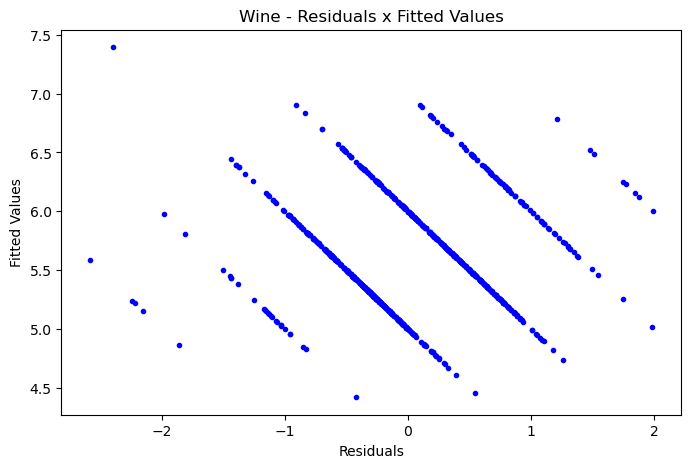

In [29]:
# Residuals x Fitted Values

plt.figure(figsize = (8,5))
plt.plot(lr_sm.resid, y_pred_train_sm, ".", color = "blue")
plt.xlabel("Residuals")
plt.ylabel("Fitted Values")
plt.title("Wine - Residuals x Fitted Values");

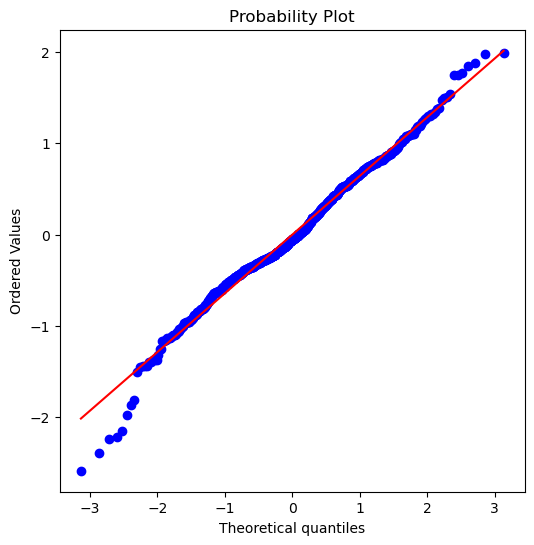

In [30]:
# Normality plot

import scipy as sp

fig, ax = plt.subplots(figsize=(6,6))

sp.stats.probplot(lr_sm.resid, plot = ax, fit = True);

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


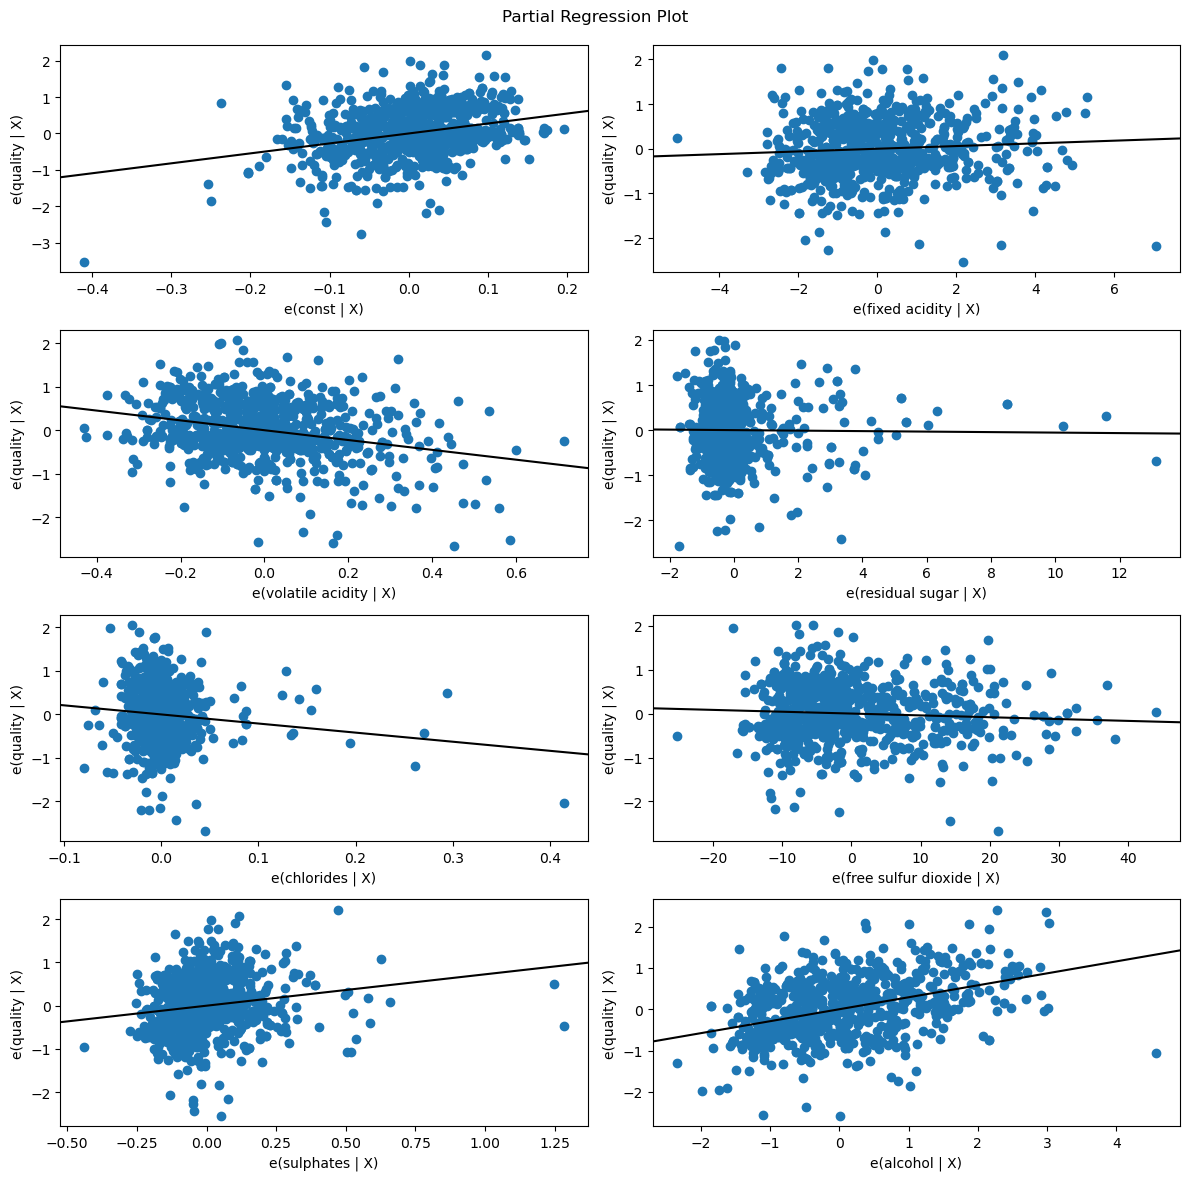

In [31]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,12))

fig = sm.graphics.plot_partregress_grid(lr_sm, fig = fig)

In [32]:
# Treinando novamente o modelo

wine2 = wine[["volatile acidity", "chlorides", "sulphates", "alcohol", "quality"]]

x = wine2.drop('quality', axis = 1)
y = wine2['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.50)

x_train_ = sm.add_constant(x_train)
x_test_ = sm.add_constant(x_test)

lr_sm2 = sm.OLS(y_train, x_train_).fit()

y_pred_train_sm = lr_sm2.predict(x_train_)

y_pred_test_sm = lr_sm2.predict(x_test_)

# Print out the statistics
lr_sm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     92.62
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           1.20e-64
Time:                        15:51:25   Log-Likelihood:                -798.51
No. Observations:                 799   AIC:                             1607.
Df Residuals:                     794   BIC:                             1630.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.9572      0.277     10.683      0.000       2.414       3.501
volatile acidity    -1.1174      0.141     -7.917      0.000      -1.394      -0.840
chlorides           -1.7725      0.554     -3.197      0.001      -2.861      -0.684
sulphates            0.6865      0.161      4.254      0.000       0.370       1.003
alcohol              0.2835      0.022     12.746      0.000       0.240       0.327
==============================================================================
Omnibus:                       19.618   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.694
Skew:                          -0.240   Prob(JB):                     9.69e-07
Kurtosis:                       3.775   Cond. No.                         255.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""